In [1]:
!pip install xarray

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import xarray as xr
import zarr


In [3]:
print(Path.cwd())
dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')

/Users/kevinha


/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_8716/1535083100.py:2: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')


In [4]:
dataset

<xarray.Dataset>
Dimensions:             (time: 966, latitude: 720, longitude: 1440)
Coordinates:
  * latitude            (latitude) float64 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude           (longitude) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>

In [5]:
def select_spatio_temporal_data(dataset, initial_timestep, timesteps, latitude, longitude):
    '''
    Desc
    ----
    Method to select a subset of the cube.
    
    Args
    ----
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    initial_timestep: int
        * value in the interval [0,965], where value represents the position of the date we want in the time array
        * shows from what 8-day period we want to extract the data
    timesteps: int
        * value in the interval [1,966]
        * shows for how many consecutive 8-days periods we want to extract the data
    latitude: int
        * vallue in the interval [0,719] where value represents the position of the latitude we want in the latitude array
        * if we want all the latitudes, we set the value = -1
    longitude: int
        * vallue in the interval [0,1439] where value represents the position of the longitude we want in the longitude array
        * if we want all the longitudes, we set the value = -1    
    '''
    
    if(latitude == -1 and longitude == -1):
        return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps))
    
    return dataset.isel(time=slice(initial_timestep, initial_timestep+timesteps), latitude=latitude, longitude=longitude)

In [6]:
def select_variable_data(dataset, variable_name):
    '''
    Desc
    ----
    Method to select a particular variable (such as relaive humidity, windspeed, sst etc)
    from the DataCube.
    
    Args
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    variable name: string
        * name of the selected variable
    '''
    
    return dataset[variable_name]

In [7]:
def earth_graph(dataset, variable_name, initial_timestep, timesteps, latitude=-1, longitude=-1, col_wrap=1):
    '''
    Desc
    ----
    Method to plot whole earth for specific variable for specific time interval.
    
    Args
    ----
    dataset: xarray.Dataset
        * the dataset from which we want the selected variable
    variable name: string
        * name of the selected variable
    initial_timestep: int
        * value in the interval [0,965], where value represents the position of the date we want in the time array
        * shows from what 8-day period we want to extract the data
    timesteps: int
        * value in the interval [1,966]
        * shows for how many consecutive 8-days periods we want to extract the data
    col_wrap: int
        *how many graphs will be plotted i the same row
    latitude: int
        * value = -1, that is whole earth
    longitude: int
        * value = -1, that is whole earth
    '''
    
    if (timesteps==1):

        select_spatio_temporal_data(select_variable_data(dataset, variable_name), 
                                    initial_timestep, 
                                    timesteps, 
                                    latitude, 
                                    longitude).plot()
    else:
        
        select_spatio_temporal_data(select_variable_data(dataset, variable_name), 
                                    initial_timestep, 
                                    timesteps, 
                                    latitude, 
                                    longitude).plot(x="longitude", 
                                                    y="latitude", 
                                                    col="time", 
                                                    col_wrap=col_wrap)

In [8]:
ba= select_spatio_temporal_data(select_variable_data(dataset, 'BurntArea'), 10, 1, -1, -1)



In [9]:
ba

<xarray.DataArray 'BurntArea' (time: 1, latitude: 720, longitude: 1440)>
dask.array<getitem, shape=(1, 720, 1440), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2001-03-22T12:00:00

In [10]:
ba.head()

<xarray.DataArray 'BurntArea' (time: 1, latitude: 5, longitude: 5)>
dask.array<getitem, shape=(1, 5, 5), dtype=float32, chunksize=(1, 5, 5), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 89.88 89.62 89.38 89.12 88.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 -179.1 -178.9
  * time       (time) datetime64[ns] 2001-03-22T12:00:00

In [11]:
df= ba.to_dataframe()

In [12]:
df

BurntArea
time                latitude longitude           
2001-03-22 12:00:00  89.875  -179.875         NaN
                             -179.625         NaN
                             -179.375         NaN
                             -179.125         NaN
                             -178.875         NaN
...                                           ...
                    -89.875   178.875         0.0
                              179.125         0.0
                              179.375         0.0
                              179.625         0.0
                              179.875         0.0

[1036800 rows x 1 columns]

In [15]:
import seaborn as sns


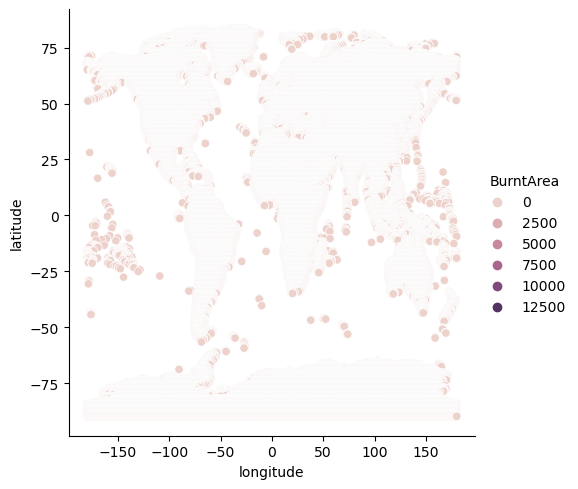

In [17]:
sns.relplot(data=df, x="longitude", y="latitude", hue="BurntArea")

<Axes: xlabel='BurntArea'>

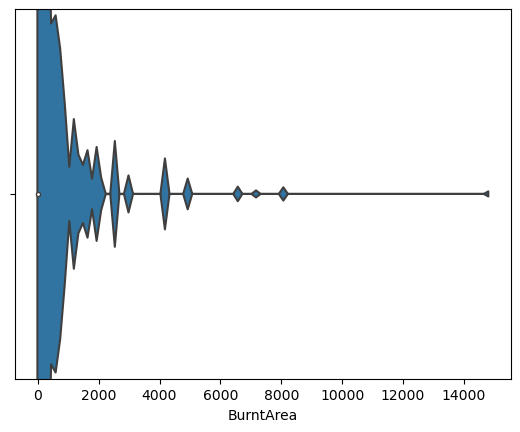

In [27]:
sns.violinplot(x=df["BurntArea"], width=5000)